In [1]:
"The notebook for selecting those regulation relations that are statistically significant that are inferred in 5th step"

'The notebook for selecting those regulation relations that are statistically significant that are inferred in 5th step'

In [18]:
"Parameters:fdrate: The false discover rate for identifying the significant regulations"

[1] "Parameters:fdrate: The false discover rate for identifying the significant regulations"

In [19]:
"Return: The matrix that setting those non-significant regulations as 0"

[1] "Return: The matrix that setting those non-significant regulations as 0"

In [6]:
fdrate<-0.05

In [7]:
setwd('/Users/fz2gz/Desktop/project/Frustration_paper/Frus_github/result')

In [8]:
library(locfdr)
library(reticulate)

[1] 220900      3


Warning message in locfdr(F_data, bre = max(ceiling(0.001 * length(F_data)), 100), :
“f(z) misfit = 8.9.  Rerun with increased df”


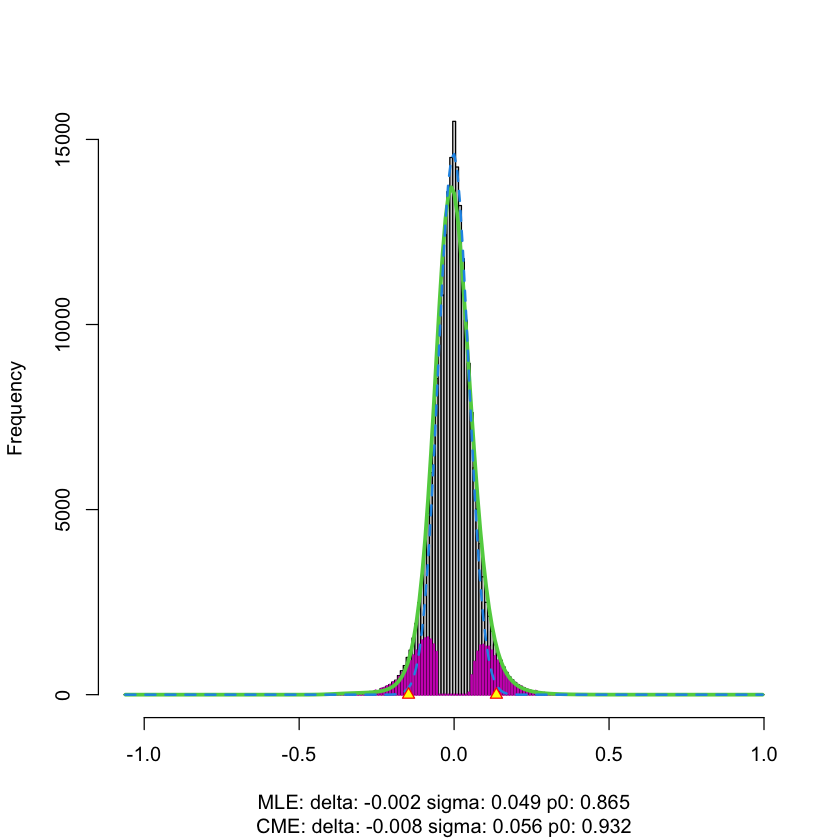

[1] 5145


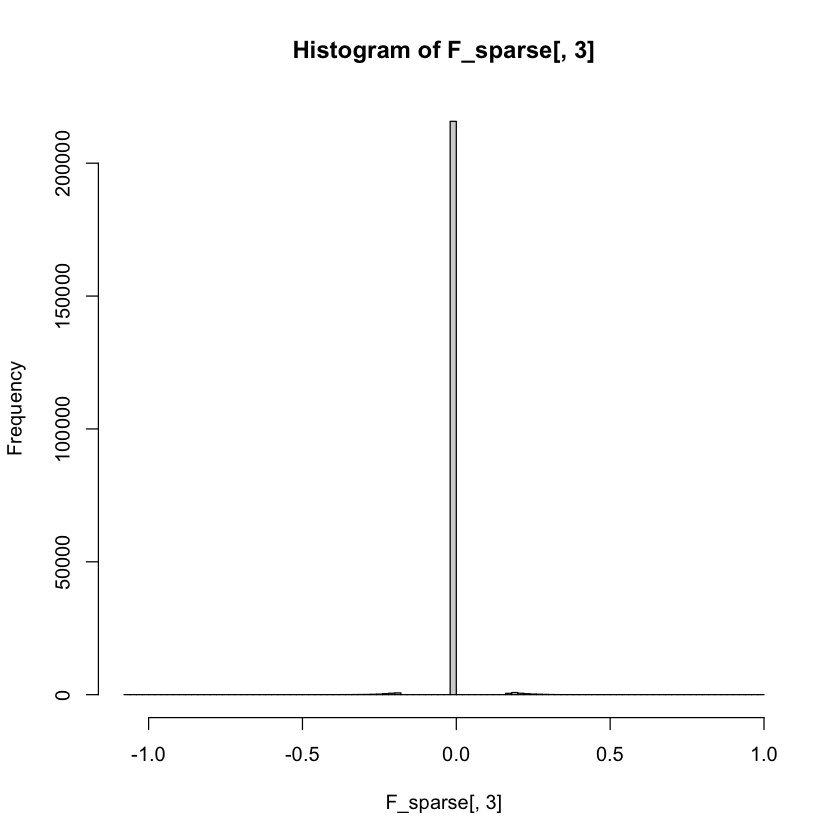

In [9]:
np <-import("numpy")


F_sparse<-np$load('dyn_EG_F.npy')
F_data<-F_sparse[,3]
print(dim(F_sparse))
w <- locfdr(F_data,bre=max(ceiling(1e-3*length(F_data)),100),df=10,nulltype=1,plot=1)
#     hist(F_sparse[,3],breaks=100)
F_sparse[,3][which(w$fdr>=fdrate)]<-0
hist(F_sparse[,3],breaks=100)
np$save(file.path(getwd(),'sparse_EG_F.npy'),F_sparse)
print(length(which(w$fdr<=fdrate)))